In [15]:
import numpy as np
import pylab 
import matplotlib
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm

In [16]:
params = {'text.usetex': True}
pylab.rcParams.update(params)
FS = 22
matplotlib.rcParams['figure.figsize'] = (10., 10./1.618)
matplotlib.rcParams['figure.titlesize'] = FS
matplotlib.rcParams['figure.subplot.wspace'] = 0.
matplotlib.rcParams['figure.subplot.hspace'] = 0.2
#matplotlib.rcParams['font.family'] = 'serif'
#matplotlib.rcParams['font.serif'] = 'Computer Modern Roman'
matplotlib.rcParams['font.serif']= 'Times New Roman'
matplotlib.rcParams['xtick.labelsize'] = FS
matplotlib.rcParams['ytick.labelsize'] = FS
matplotlib.rcParams['axes.labelsize'] = FS
matplotlib.rcParams['legend.fontsize'] = FS
matplotlib.rcParams['legend.borderpad'] = 0.1
matplotlib.rcParams['legend.loc'] = 'best'
matplotlib.rcParams['legend.borderaxespad'] = 0.2
matplotlib.rcParams['legend.fancybox'] = True
matplotlib.rcParams['axes.titlesize'] = FS

In [17]:
tov_folder = '/home/agonzalez/Documents/git/tov/Sequences/Complete/'
files = sorted(os.listdir(tov_folder))
files = [f for f in files if f.__contains__('sequence.txt')]
labels = [f.split('_')[0] for f in files]
#files.append('TOV_eosBLQ.txt')
#labels.append('BLQ1')
print(labels)



['2B', '2H', 'ALF2', 'APR4', 'BHBlp', 'BLQ', 'BLh', 'DD2', 'ENG', 'H3', 'H4', 'HB', 'LS200', 'MPA1', 'MS1', 'MS1b', 'SFHo', 'SLy', 'TM1', 'TMA']


In [18]:
#Const. from Wikipedia
G = 6.67408*1e-11
c = 299792458.
Msun = 1.989*1e30
GMsun_c2 = G*Msun/c**2

2B_sequence.txt
1.783269
9.750604869035689
2H_sequence.txt
2.834889
15.213265049067365
ALF2_sequence.txt
1.99092
12.31835190065189
APR4_sequence.txt
2.200645
11.077612380428306
BHBlp_sequence.txt
2.100904
13.192146347133303
BLQ_sequence.txt
1.985152
12.412024165961524
BLh_sequence.txt
2.102596
12.466277865888257
DD2_sequence.txt
2.422536
13.189825957212122
ENG_sequence.txt
2.250518
11.66901049935359
H3_sequence.txt
1.700954
13.162513003410393
H4_sequence.txt
2.028082
13.54649544045037
HB_sequence.txt
2.450987
13.294143066673229
LS200_sequence.txt
2.043796
12.746761459550092
MPA1_sequence.txt
2.470274
12.054669347953428
MS1_sequence.txt
2.769301
14.373134719125485
MS1b_sequence.txt
2.762828
13.961514385073935
SFHo_sequence.txt
2.058879
11.934936637214546
SLy_sequence.txt
2.054827
11.801918180236937
TM1_sequence.txt
2.213552
14.504606741827171
TMA_sequence.txt
2.022109
14.356670437488676


/tmp/ipykernel_36045/880043987.py:85: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[1].set_ylim(0,1e4)


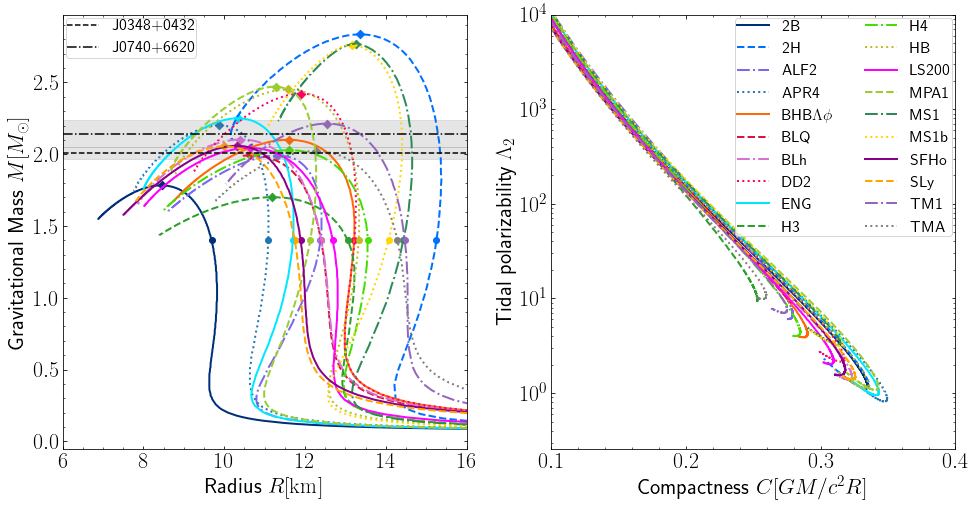

In [13]:
#colors = cm.rainbow(np.linspace(0,1,len(files)))
colordict = {
    '2B' : '#002F79',#[0,47,121],
    '2H' : '#0070FF',#[0,112,255],
    'ALF2': 'mediumslateblue',#[0,169,255],
    'ENG': '#00E8FF',#[0,232,255],
    'APR4': 'tab:blue',#[0,250,146],
    'H3': 'tab:green',
    'H4': '#46DD00',#[70,221,0],
    'MPA1': 'yellowgreen',#[125,248,3],
    'MS1': 'seagreen',#[186,255,59],
    'MS1b': 'gold',#[236,255,15],
    'SLy': 'orange',
    'BHBlp': '#FF6804',#[255,104,4],
    'DD2': '#FF006A',#[255,0,106],
    'LS220': 'hotpink',#[255,0,194],
    'SFHo': 'darkmagenta',#[182,74,248],
    'BLh': 'orchid',#[211,103,242],
    'BLQ': 'crimson',#crimson
    'SLy4': 'pink',
    'TM1': 'tab:purple',
    'TMA': 'tab:gray',
    'HB': 'tab:olive',
    'LS200': 'magenta'
}

fig, axes = plt.subplots(1, 2, figsize=(16.,8.))
fig.subplots_adjust(wspace = 0.21)
# labels = labels[0:5]
for i, f in enumerate(files):    
    try:
        linecolor = colordict[labels[i]]
        if labels[i].__contains__('BHB'):
            labels[i] = r'BHB$\Lambda\phi$'
        if i%4 == 0:
            ls = '-'
        elif i%4 == 1:
            ls = '--'
        elif i%4 == 2:
            ls = '-.'
        else:
            ls = ':'
        lw = 2  
        if labels[i]=='BLQ':
            rhoc, R, Mb, M, C = np.genfromtxt('TOV_eosBLQ.txt', unpack = True, usecols = (0,2,3,4,5), skip_header=1)
            Mmax = np.max(M)
            Rmmax = R[np.argmax(M)]
            R14 = np.interp(1.4,M,R)
            axes[0].scatter(R14,1.4,c=linecolor,marker='o')
            axes[0].scatter(Rmmax,Mmax,c=linecolor,marker='D')
            axes[0].plot(R, M, c=linecolor, ls = ls, linewidth=lw)
            rhoc, M, Mb, R, C, kl, lam = np.genfromtxt(tov_folder+f, unpack = True, usecols = (0,1,2,3,4,5,6), skip_header=1)
            axes[1].semilogy(C, lam, label = labels[i], c=linecolor, ls=ls, linewidth=lw)
        else:
            rhoc, M, Mb, R, C, kl, lam = np.genfromtxt(tov_folder+f, unpack = True, usecols = (0,1,2,3,4,5,6), skip_header=1)
            Mmax = np.max(M)
            Rmmax = R[np.argmax(M)]*GMsun_c2/1e3
            R14 = np.interp(1.4,M,R)*GMsun_c2/1e3
            axes[0].scatter(R14,1.4,c=linecolor,marker='o')
            axes[0].scatter(Rmmax,Mmax,c=linecolor,marker='D')
            axes[0].plot(R*GMsun_c2/1e3, M, c=linecolor, ls = ls, linewidth=lw)
            axes[1].semilogy(C, lam, label = labels[i], c=linecolor, ls=ls, linewidth=lw)
        print(f)
        print(np.max(M))
        print(R[np.argmin(np.abs(M-1.3))]*GMsun_c2/1e3)
    except KeyError:
        continue    

axes[0].set_ylabel(r'Gravitational Mass $M[M_\odot]$')
axes[0].set_xlabel(r'Radius $R[{\rm km}]$')
axes[0].set_xticks(np.arange(5,11,0.5), minor=True)
axes[0].set_xlim(6,16)
axes[0].axhline(y = 2.01, color = 'k', ls = '--', label= 'J0348+0432')
axes[0].fill_between([6,16],y1 = 2.01-0.04, y2 = 2.01+0.04, color = 'grey', alpha = 0.2)
axes[0].axhline(y = 2.14, color = 'k', ls = '-.', label = 'J0740+6620')
axes[0].fill_between([6,16],y1 = 2.14-0.09, y2 = 2.14+0.1, color = 'grey', alpha = 0.2)
axes[0].legend(loc = 'best', fontsize = 16)
axes[1].legend(loc = 'upper left', fontsize = 16)
#axes[0].set_ylim(1.,3.)
axes[0].tick_params(axis='both', which='both', labelleft=True, labelright=False, tick1On=True, tick2On=True, direction='in')
axes[0].minorticks_on()
axes[1].set_ylabel(r'Tidal polarizability $\Lambda_2$')
axes[1].set_xlabel(r'Compactness $C[GM/c^2R]$')
axes[1].set_xlim(0.1,0.4)
axes[1].set_ylim(0,1e4)
#axes[1].set_yticks(np.arange(0,1600,100), minor=True)
#axes[1].set_xlim(0.09,0.2)
#axes[1].set_ylim(0.,10000.)
axes[1].minorticks_on()
axes[1].tick_params(axis='both', which='both', labelleft=True, labelright=False, tick1On=True, tick2On=True, direction='in')
#ax1.legend(loc = 'best', fontsize = 15)
axes[1].legend(loc = 'best', fontsize = 16, ncol = 2)
plt.savefig('MR_LamC_diagram.pdf')


2B_sequence.txt
1.783269
9.750604869035689
2H_sequence.txt
2.834889
15.213265049067365
ALF2_sequence.txt
1.99092
12.31835190065189
APR4_sequence.txt
2.200645
11.077612380428306
BHBlp_sequence.txt
2.100904
13.192146347133303
BLQ_sequence.txt
1.985152
12.412024165961524
BLh_sequence.txt
2.102596
12.466277865888257
DD2_sequence.txt
2.422536
13.189825957212122
ENG_sequence.txt
2.250518
11.66901049935359
H3_sequence.txt
1.700954
13.162513003410393
H4_sequence.txt
2.028082
13.54649544045037
HB_sequence.txt
2.450987
13.294143066673229
LS200_sequence.txt
2.043796
12.746761459550092
MPA1_sequence.txt
2.470274
12.054669347953428
MS1_sequence.txt
2.769301
14.373134719125485
MS1b_sequence.txt
2.762828
13.961514385073935
SFHo_sequence.txt
2.058879
11.934936637214546
SLy_sequence.txt
2.054827
11.801918180236937
TM1_sequence.txt
2.213552
14.504606741827171
TMA_sequence.txt
2.022109
14.356670437488676


/tmp/ipykernel_36045/2920948041.py:85: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[1].set_ylim(0,1e4)


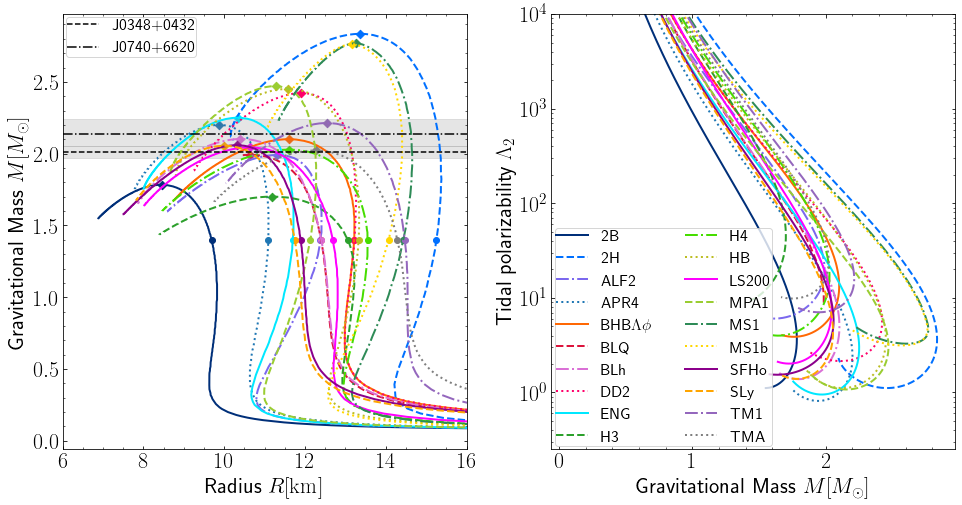

In [19]:
#colors = cm.rainbow(np.linspace(0,1,len(files)))
colordict = {
    '2B' : '#002F79',#[0,47,121],
    '2H' : '#0070FF',#[0,112,255],
    'ALF2': 'mediumslateblue',#[0,169,255],
    'ENG': '#00E8FF',#[0,232,255],
    'APR4': 'tab:blue',#[0,250,146],
    'H3': 'tab:green',
    'H4': '#46DD00',#[70,221,0],
    'MPA1': 'yellowgreen',#[125,248,3],
    'MS1': 'seagreen',#[186,255,59],
    'MS1b': 'gold',#[236,255,15],
    'SLy': 'orange',
    'BHBlp': '#FF6804',#[255,104,4],
    'DD2': '#FF006A',#[255,0,106],
    'LS220': 'hotpink',#[255,0,194],
    'SFHo': 'darkmagenta',#[182,74,248],
    'BLh': 'orchid',#[211,103,242],
    'BLQ': 'crimson',#crimson
    'SLy4': 'pink',
    'TM1': 'tab:purple',
    'TMA': 'tab:gray',
    'HB': 'tab:olive',
    'LS200': 'magenta'
}

fig, axes = plt.subplots(1, 2, figsize=(16.,8.))
fig.subplots_adjust(wspace = 0.21)
# labels = labels[0:5]
for i, f in enumerate(files):    
    try:
        linecolor = colordict[labels[i]]
        if labels[i].__contains__('BHB'):
            labels[i] = r'BHB$\Lambda\phi$'
        if i%4 == 0:
            ls = '-'
        elif i%4 == 1:
            ls = '--'
        elif i%4 == 2:
            ls = '-.'
        else:
            ls = ':'
        lw = 2  
        if labels[i]=='BLQ':
            rhoc, R, Mb, M, C = np.genfromtxt('TOV_eosBLQ.txt', unpack = True, usecols = (0,2,3,4,5), skip_header=1)
            Mmax = np.max(M)
            Rmmax = R[np.argmax(M)]
            R14 = np.interp(1.4,M,R)
            axes[0].scatter(R14,1.4,c=linecolor,marker='o')
            axes[0].scatter(Rmmax,Mmax,c=linecolor,marker='D')
            axes[0].plot(R, M, c=linecolor, ls = ls, linewidth=lw)
            rhoc, M, Mb, R, C, kl, lam = np.genfromtxt(tov_folder+f, unpack = True, usecols = (0,1,2,3,4,5,6), skip_header=1)
            axes[1].semilogy(M, lam, label = labels[i], c=linecolor, ls=ls, linewidth=lw)
        else:
            rhoc, M, Mb, R, C, kl, lam = np.genfromtxt(tov_folder+f, unpack = True, usecols = (0,1,2,3,4,5,6), skip_header=1)
            Mmax = np.max(M)
            Rmmax = R[np.argmax(M)]*GMsun_c2/1e3
            R14 = np.interp(1.4,M,R)*GMsun_c2/1e3
            axes[0].scatter(R14,1.4,c=linecolor,marker='o')
            axes[0].scatter(Rmmax,Mmax,c=linecolor,marker='D')
            axes[0].plot(R*GMsun_c2/1e3, M, c=linecolor, ls = ls, linewidth=lw)
            axes[1].semilogy(M, lam, label = labels[i], c=linecolor, ls=ls, linewidth=lw)
        print(f)
        print(np.max(M))
        print(R[np.argmin(np.abs(M-1.3))]*GMsun_c2/1e3)
    except KeyError:
        continue    

axes[0].set_ylabel(r'Gravitational Mass $M[M_\odot]$')
axes[0].set_xlabel(r'Radius $R[{\rm km}]$')
axes[0].set_xticks(np.arange(5,11,0.5), minor=True)
axes[0].set_xlim(6,16)
axes[0].axhline(y = 2.01, color = 'k', ls = '--', label= 'J0348+0432')
axes[0].fill_between([6,16],y1 = 2.01-0.04, y2 = 2.01+0.04, color = 'grey', alpha = 0.2)
axes[0].axhline(y = 2.14, color = 'k', ls = '-.', label = 'J0740+6620')
axes[0].fill_between([6,16],y1 = 2.14-0.09, y2 = 2.14+0.1, color = 'grey', alpha = 0.2)
axes[0].legend(loc = 'best', fontsize = 16)
axes[1].legend(loc = 'upper right', fontsize = 16)
#axes[0].set_ylim(1.,3.)
axes[0].tick_params(axis='both', which='both', labelleft=True, labelright=False, tick1On=True, tick2On=True, direction='in')
axes[0].minorticks_on()
axes[1].set_ylabel(r'Tidal polarizability $\Lambda_2$')
axes[1].set_xlabel(r'Gravitational Mass $M[M_\odot]$')
#axes[1].set_xlim(0.1,0.4)
axes[1].set_ylim(0,1e4)
#axes[1].set_yticks(np.arange(0,1600,100), minor=True)
#axes[1].set_xlim(0.09,0.2)
#axes[1].set_ylim(0.,10000.)
axes[1].minorticks_on()
axes[1].tick_params(axis='both', which='both', labelleft=True, labelright=False, tick1On=True, tick2On=True, direction='in')
#ax1.legend(loc = 'best', fontsize = 15)
axes[1].legend(loc = 'best', fontsize = 16, ncol = 2)
plt.savefig('MR_LamM_diagram.pdf')